In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('C:/Users/shara/OneDrive/Desktop/Zeotap/Customers.csv')
transactions = pd.read_csv('C:/Users/shara/OneDrive/Desktop/Zeotap/Transactions.csv')

# Merge customers and transactions
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

# Create a feature for the total amount spent by each customer
customer_spending = customer_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'TotalSpent']

# Merge the spending data back with the customers data
customers = pd.merge(customers, customer_spending, on='CustomerID', how='left').fillna(0)

# Display the merged dataset
print(customers.head())


  CustomerID        CustomerName         Region  SignupDate  TotalSpent
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74
2      C0003      Michael Rivera  South America  2024-03-07     2725.38
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88
4      C0005         Laura Weber           Asia  2022-08-15     2034.24


  CustomerID        CustomerName         Region  SignupDate  TotalSpent
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74
2      C0003      Michael Rivera  South America  2024-03-07     2725.38
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88
4      C0005         Laura Weber           Asia  2022-08-15     2034.24


C:\Users\shara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

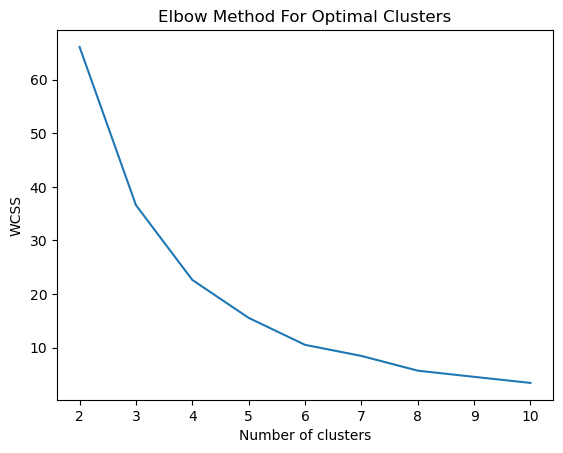

In [5]:
import os

# Set the environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the datasets
customers = pd.read_csv('C:/Users/shara/OneDrive/Desktop/Zeotap/Customers.csv')
transactions = pd.read_csv('C:/Users/shara/OneDrive/Desktop/Zeotap/Transactions.csv')

# Merge customers and transactions
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

# Create a feature for the total amount spent by each customer
customer_spending = customer_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'TotalSpent']

# Merge the spending data back with the customers data
customers = pd.merge(customers, customer_spending, on='CustomerID', how='left').fillna(0)

# Display the merged dataset
print(customers.head())

# Select features for clustering
features = ['TotalSpent']  # Add more features as needed

# Standardize the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customers[features])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
from sklearn.metrics import davies_bouldin_score

# Train the KMeans model with the optimal number of clusters
optimal_clusters = 4  # Choose based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customers['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Calculate the DB Index
db_index = davies_bouldin_score(customer_data_scaled, customers['Cluster'])
print('Davies-Bouldin Index:', db_index)

# Display clustering results
print(customers.head())


Davies-Bouldin Index: 0.5500250036616317
  CustomerID        CustomerName         Region  SignupDate  TotalSpent  \
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2      C0003      Michael Rivera  South America  2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4      C0005         Laura Weber           Asia  2022-08-15     2034.24   

   Cluster  
0        1  
1        1  
2        1  
3        3  
4        1  


C:\Users\shara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


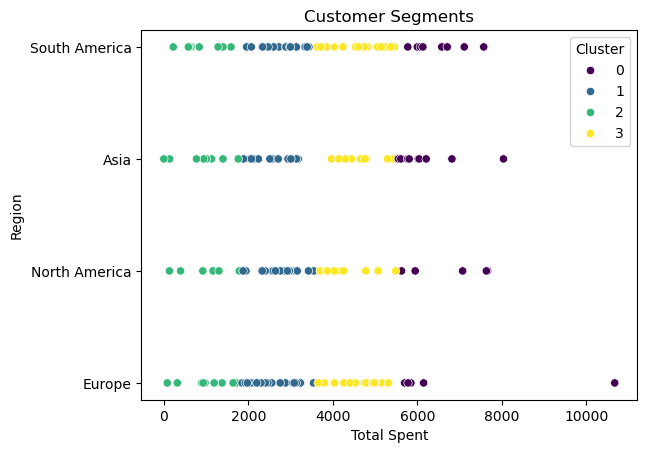

In [7]:
import seaborn as sns

# Plot clusters
sns.scatterplot(x='TotalSpent', y='Region', hue='Cluster', data=customers, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Spent')
plt.ylabel('Region')
plt.show()
